In [399]:
import pandas as pd
import seaborn as sns
import os
import os.path as osp
import matplotlib.pyplot as plt
import collections

In [425]:
path = "results/density_0.05/cifar10/resnet34/csv"
seeds = ['1', '2', '3']
gname = 'graph_seed-'
sname = 'summary-'
density = path.split('/')[1].split('_')[-1]

In [417]:
def get_csv(seed):
    graphs = pd.read_csv(osp.join(path, gname+seed+'.csv'))
    summary = pd.read_csv(osp.join(path, sname+seed+'.csv'))
    graphs['ram_crit'] = graphs[['rm', 'sm']].max(axis=1)
    graphs.loc[graphs.sparsity == 1.0, 'ram_crit'] = 1.0
    
    return graphs, summary

In [418]:
graphs, summary = get_csv('2')

In [419]:
def savefig(dst, title):
    os.makedirs(dst, exist_ok=True)
    plt.savefig(osp.join(dst, title+'.png'))
    
def line_plot(m:pd.DataFrame, x:str, y:str, hue:str, dst:str=None, filter_by = None,title:str=None, ylim=(-1, 1)):
    # c = sns.color_palette("flare", as_cmap=True)\
    plt.figure(figsize=(12,8))
    if filter_by:
        masks = None
        for cond in filter_by:
            mask = m.prune_type.str.contains(cond)
            if masks is None: masks=mask
            else:
                masks |= mask
        m = m[masks]
    g= sns.lineplot(data=m,x=x,y=y,hue=hue,)
    plt.xticks(rotation=90)
    if title:
        g.set(title=title)
    plt.ylim(ylim)
    if dst:
        savefig(dst, title)
        
def bar_plot(m:pd.DataFrame, x:str, y:str, dst:str=None, filter_by = None,title:str=None, ylim=(-1, 1), op='max'):
    # c = sns.color_palette("flare", as_cmap=True)\
    plt.figure(figsize=(12,8))
    if filter_by:
        masks = None
        for cond in filter_by:
            mask = m.prune_type.str.contains(cond)
            if masks is None: masks=mask
            else:
                masks |= mask
        m = m[masks]
    df = collections.defaultdict(list)
    for cat in m[x].unique():
        df[x].append(cat)
        if op == 'max':
            df[y].append(m.loc[m[x] == cat][y].max())
        elif op == 'min':
            df[y].append(m.loc[m[x] == cat][y].min())
        elif op == 'mean':
            df[y].append(m.loc[m[x] == cat][y].mean())
        else:
            raise NotImplementedError

    df = pd.DataFrame.from_dict(df)
    df = df.sort_values(by=[y])
    g = sns.barplot(data=df, x=x, y=y)
    for i in g.containers:
        g.bar_label(i,)
    if title:
        g.set(title=title)
    plt.ylim(ylim)
    if dst:
        savefig(dst, title)
    

In [414]:
filter_by = ['Rand', 'GraSP', 'iterSNIP', 'SNIP', 'SynFlow', 'PHEW', 'ERK']

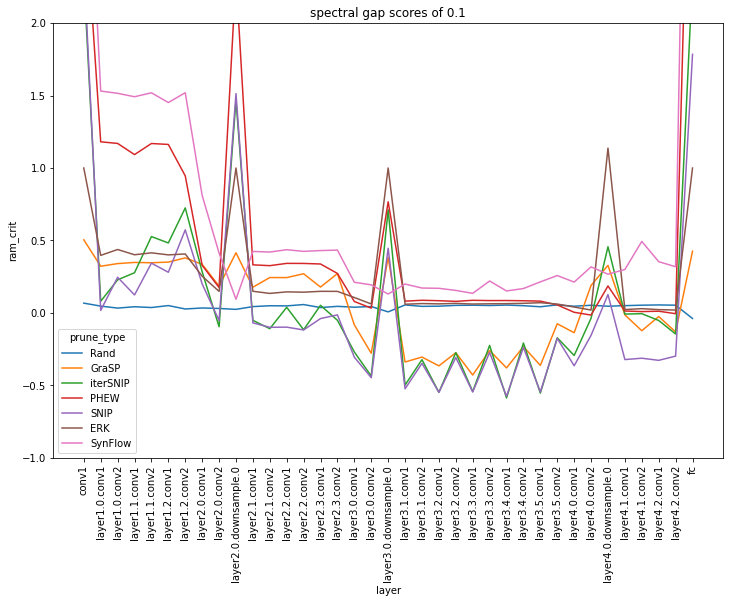

In [415]:
line_plot(graphs, x='layer', y='ram_crit', hue='prune_type', title=f'spectral gap scores of {density}', filter_by=filter_by, ylim=(-1, 2), dst='figures')

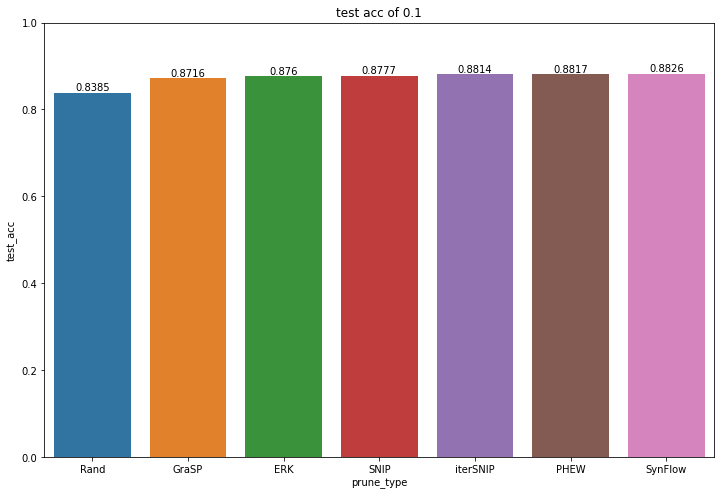

In [398]:
bar_plot(summary, x='prune_type', y='test_acc', title=f'test acc of {density}', ylim=(-0.0, 1),  filter_by=filter_by, dst='figures')

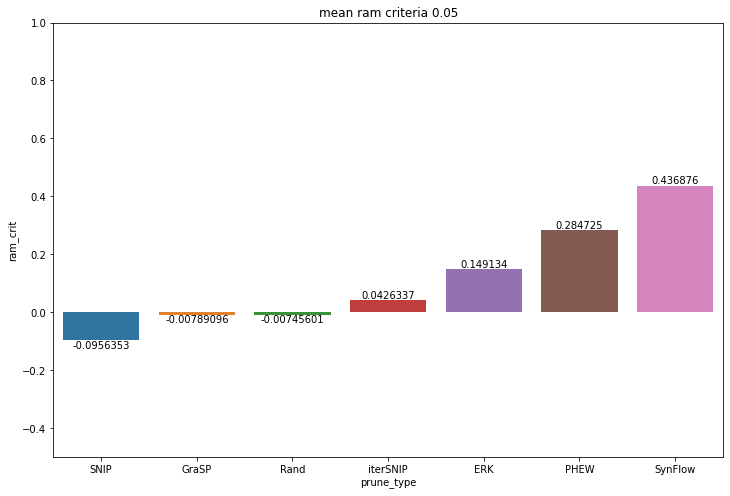

In [427]:
bar_plot(graphs, x='prune_type', y='ram_crit', title=f'mean ram criteria {density}', ylim=(-0.5, 1.0),  filter_by=filter_by, op='mean', dst='figures')

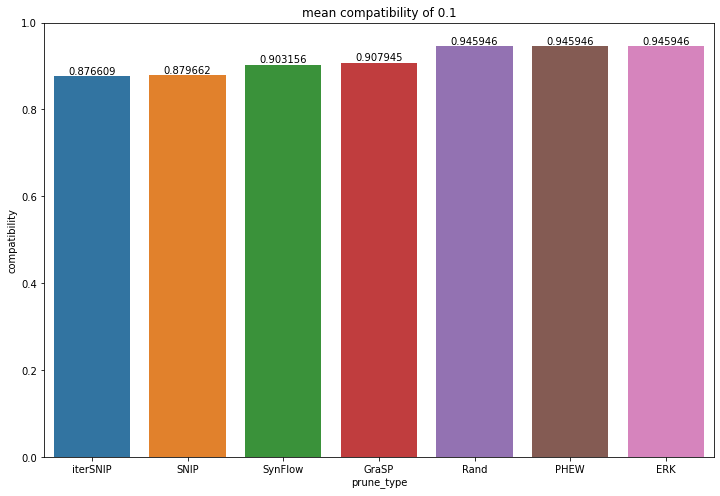

In [390]:
bar_plot(graphs, x='prune_type', y='compatibility', title=f'mean compatibility of {density}', ylim=(-0.0, 1),  filter_by=filter_by, op='mean', dst='figures')

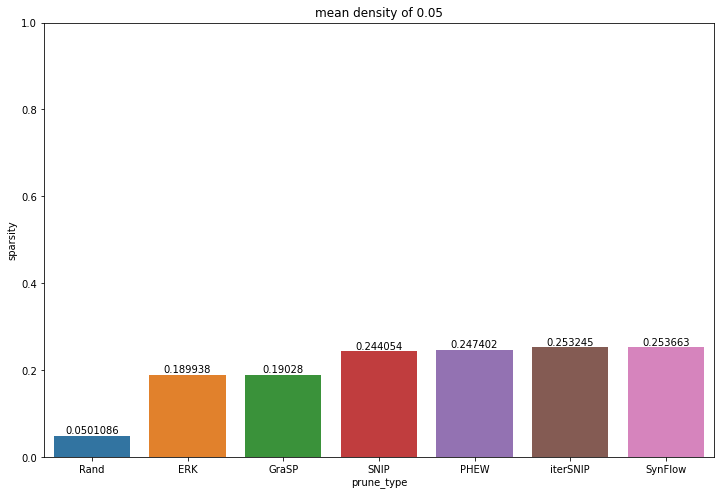

In [381]:
bar_plot(graphs, x='prune_type', y='sparsity', title=f'mean density of {density}', ylim=(-0.0, 1),  filter_by=filter_by, op='mean', dst='figures')

In [407]:
graphs.loc[graphs.prune_type == 'ERK']

,prune_type,layer,sparsity,sm,rm,sw,rw,t1m,t1w,copeland_score,compatibility,overlap_coefs,ram_crit
185,ERK,conv1,1.000000,9.695659e+06,9.905899e+06,9.695659e+06,9.905899e+06,96.994865,96.994865,0.484673,1.0,1.000000,9.905899e+06
186,ERK,layer1.0.conv1,0.484673,2.260109e-01,4.092542e-01,2.260109e-01,4.092542e-01,93.894450,93.894450,0.991621,1.0,0.001159,4.092542e-01
187,ERK,layer1.0.conv2,0.479655,2.110430e-01,3.919995e-01,2.110430e-01,3.919995e-01,92.928620,92.928620,1.011475,1.0,0.003212,3.919995e-01
188,ERK,layer1.1.conv1,0.484185,2.198124e-01,4.024648e-01,2.198124e-01,4.024648e-01,93.755424,93.755424,1.003672,1.0,0.005365,4.024648e-01
189,ERK,layer1.1.conv2,0.485324,2.281875e-01,4.115019e-01,2.281875e-01,4.115019e-01,94.054085,94.054085,0.990682,1.0,0.002256,4.115019e-01
190,ERK,layer1.2.conv1,0.480089,2.285147e-01,4.115871e-01,2.285147e-01,4.115871e-01,93.077225,93.077225,1.004128,1.0,0.001953,4.115871e-01
191,ERK,layer1.2.conv2,0.481255,2.325996e-01,4.165217e-01,2.325996e-01,4.165217e-01,93.272010,93.272010,0.741923,1.0,0.002452,4.165217e-01
192,ERK,layer2.0.conv1,0.356038,1.723620e-01,2.505004e-01,1.723620e-01,2.505004e-01,97.550950,97.550950,0.660675,1.0,0.000000,2.505004e-01
193,ERK,layer2.0.conv2,0.234436,-2.432005e-04,1.461352e-01,-2.432005e-04,1.461352e-01,91.311220,91.311220,1.002843,1.0,0.000000,1.461352e-01
194,ERK,layer2.0.downsample.0,1.000000,5.531426e+06,5.614672e+06,5.531426e+06,5.614672e+06,90.509700,90.509700,0.234416,1.0,1.000000,5.614672e+06
